# Finch Carr - Lab 04
## Problem 1

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

### Problem 1.1
- Now I have downloaded the data from the course website (gammaray_lab4.h5), and imported it into my working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. I want to make a few plots, generally exploring my data and make sure I understand it. I want to give a high level description of the data features I see as well. I want to specifically determine whether I see signal contamination in my data, and how I plan to build a background pdf().
  - What will my data look like if I plot every 10,000th time measurement (in gps seconds) on the x-axis and every 10,000th gamma-ray counts as my y-axis?

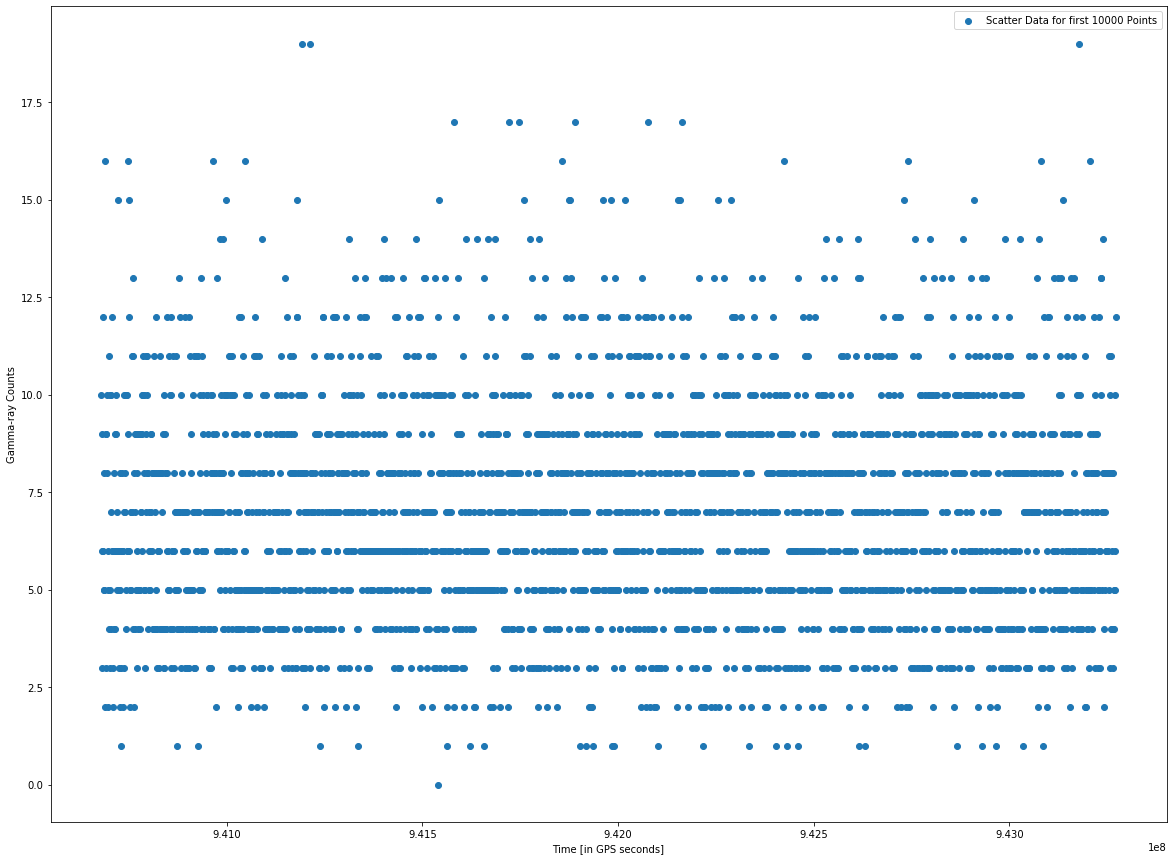

30.0

In [137]:
# Define the data points for every 10000 elements of 'data' array for the right columns
timeGPS = data[0,::10000]
gamma = data[3,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(timeGPS, gamma, label='Scatter Data for first 10000 Points')
ax.legend(loc='best')
plt.xlabel('Time [in GPS seconds]')
plt.ylabel('Gamma-ray Counts')
plt.show()
data[3,::].max()

- What if I plot the gamma ray count on the y-axis against the solar phase in degrees on the x-axis?

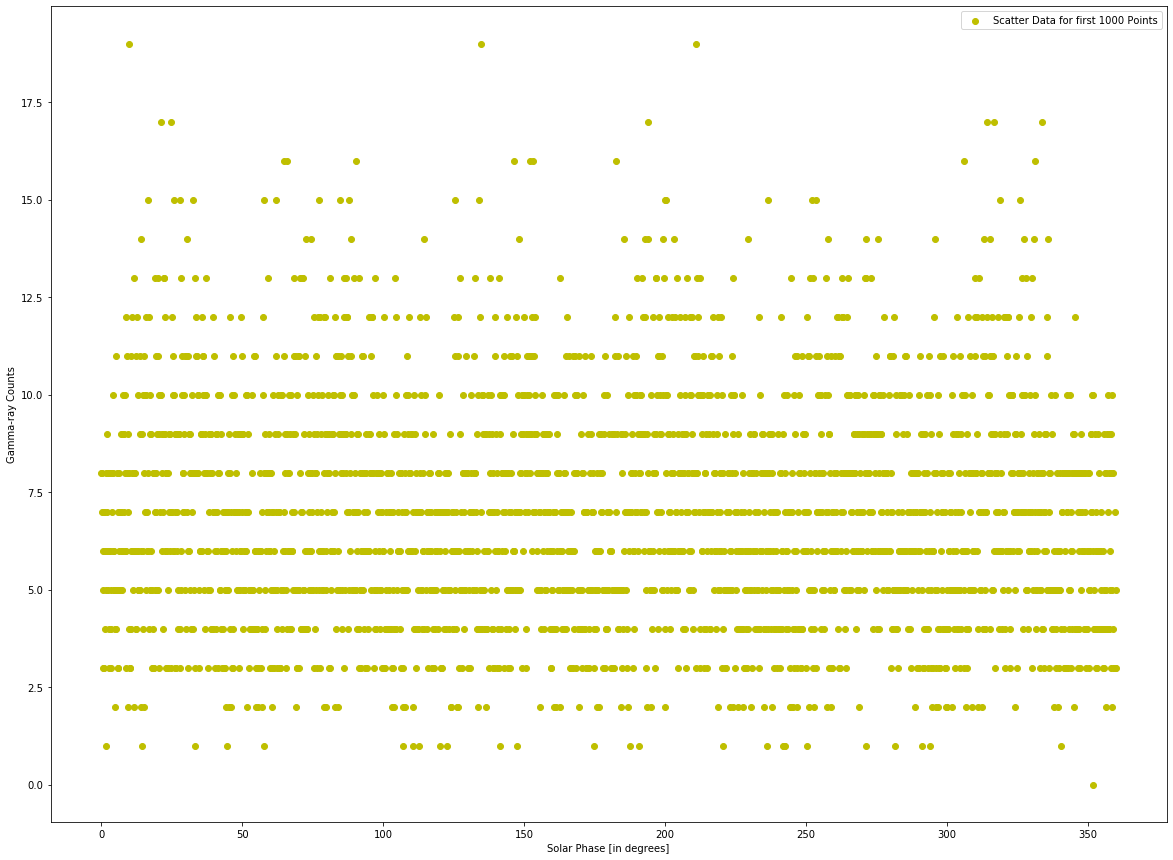

In [8]:
# Define the data points for every 10000 elements of 'data' array for the correct columns
solarphase = data[1,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(solarphase, gamma, c='y', label='Scatter Data for first 1000 Points')
ax.legend(loc='best')
plt.xlabel('Solar Phase [in degrees]')
plt.ylabel('Gamma-ray Counts')
plt.show()

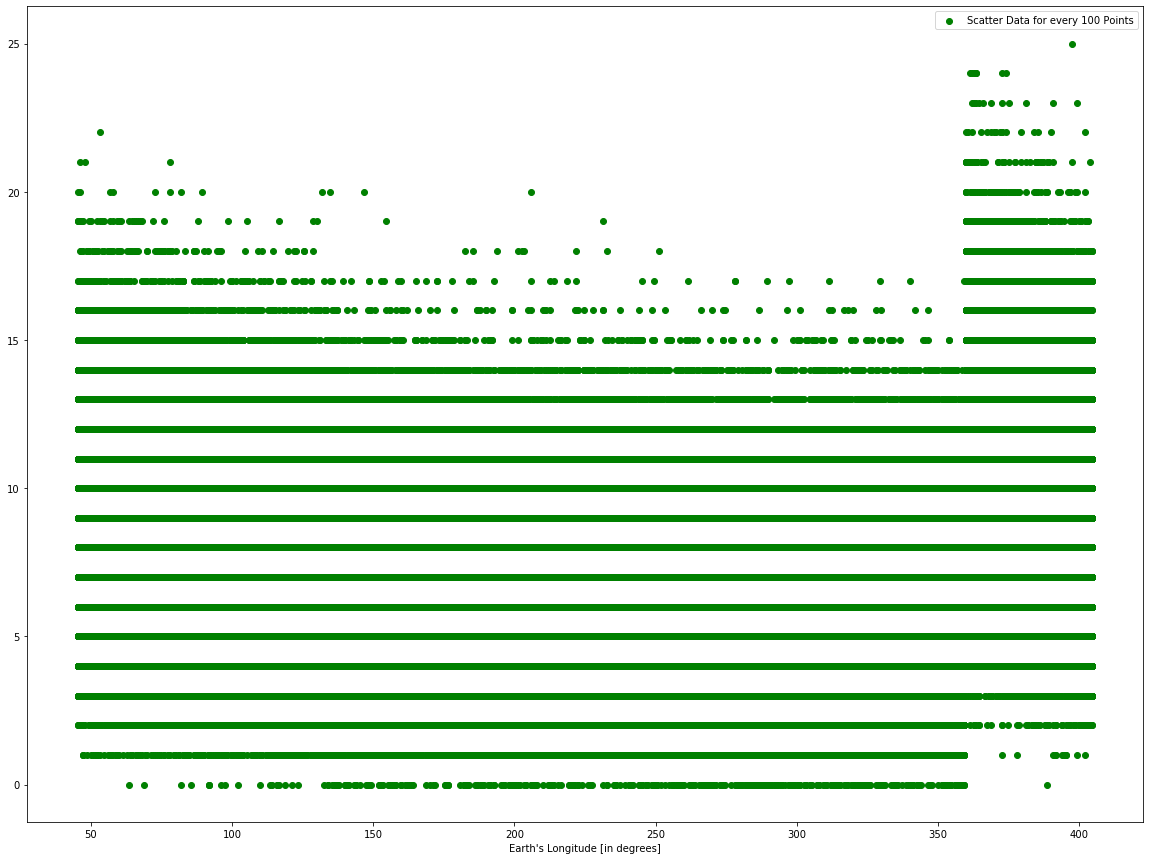

In [9]:
# Define the data points for every 1000 elements of 'data' array for the correct columns
longitude = data[2,::100]+45
y1000 = data[3,::100]
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(longitude, y1000, c='g', label='Scatter Data for every 100 Points')
ax.legend(loc='best')
plt.xlabel('Earth\'s Longitude [in degrees]')
#plt.ylabel('Gamma-ray Counts')
plt.show()

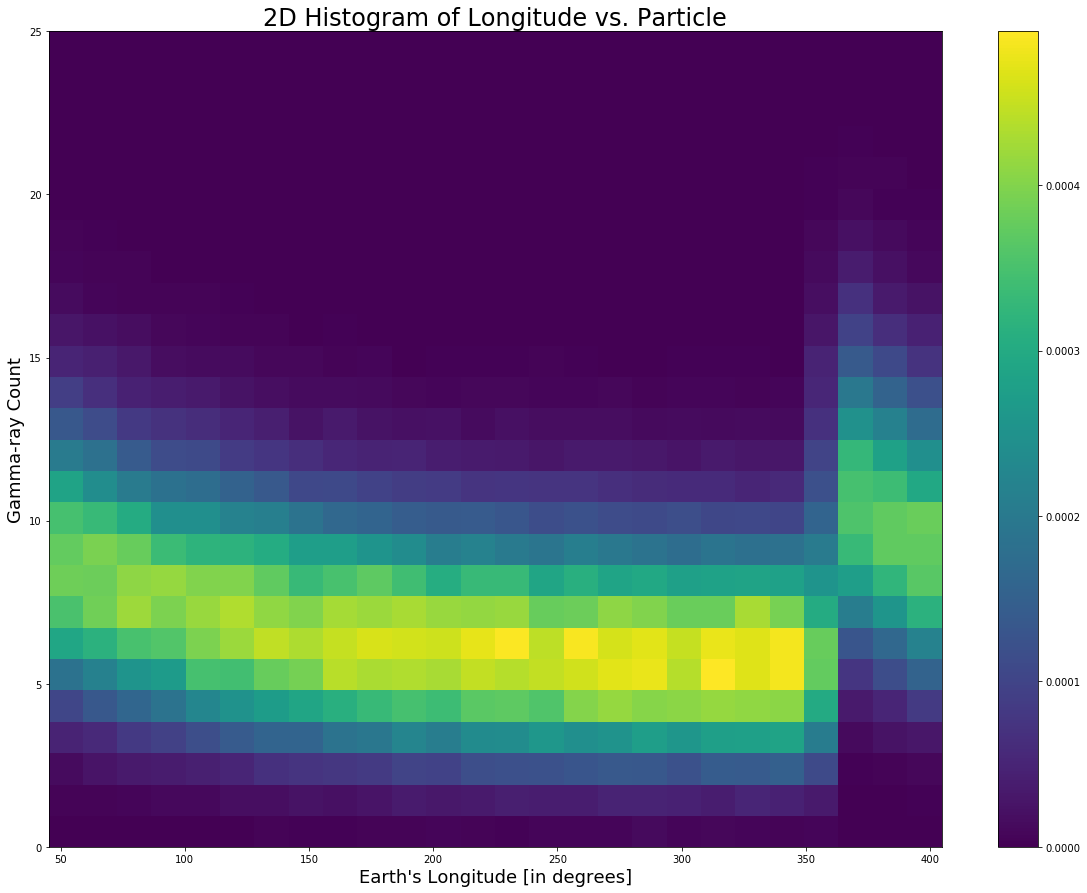

In [10]:
a = np.vstack((longitude, y1000))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=(26), density=True)
plt.title("2D Histogram of Longitude vs. Particle", fontsize = 24)
plt.ylabel("Gamma-ray Count", fontsize = 18)
plt.xlabel("Earth's Longitude [in degrees]", fontsize = 18)
plt.colorbar(h[3], ax=ax)

- To have a time dependent axis, I want to use a modulo operator on my time column such that I have one time period equal to one orbit, and the gamma counts for every orbit are plotted against the time they occured at in their respective orbit

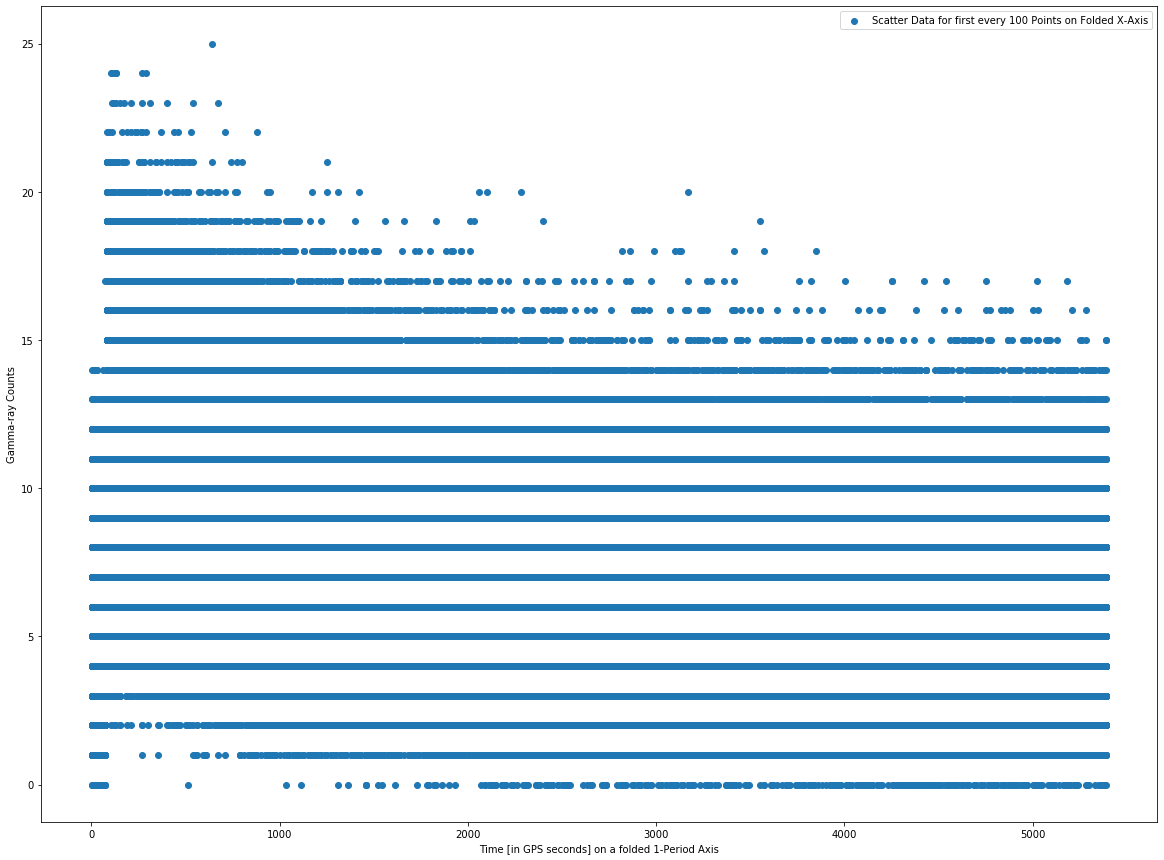

In [123]:
# Define the data points for every 100 elements of 'data' array for the right columns
timeGPSfold = (data[0,::100]-3985) % 5400
gamma = data[3,::100]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(timeGPSfold, gamma, label='Scatter Data for first every 100 Points on Folded X-Axis')
ax.legend(loc='best')
plt.xlabel('Time [in GPS seconds] on a folded 1-Period Axis')
plt.ylabel('Gamma-ray Counts')
plt.show()

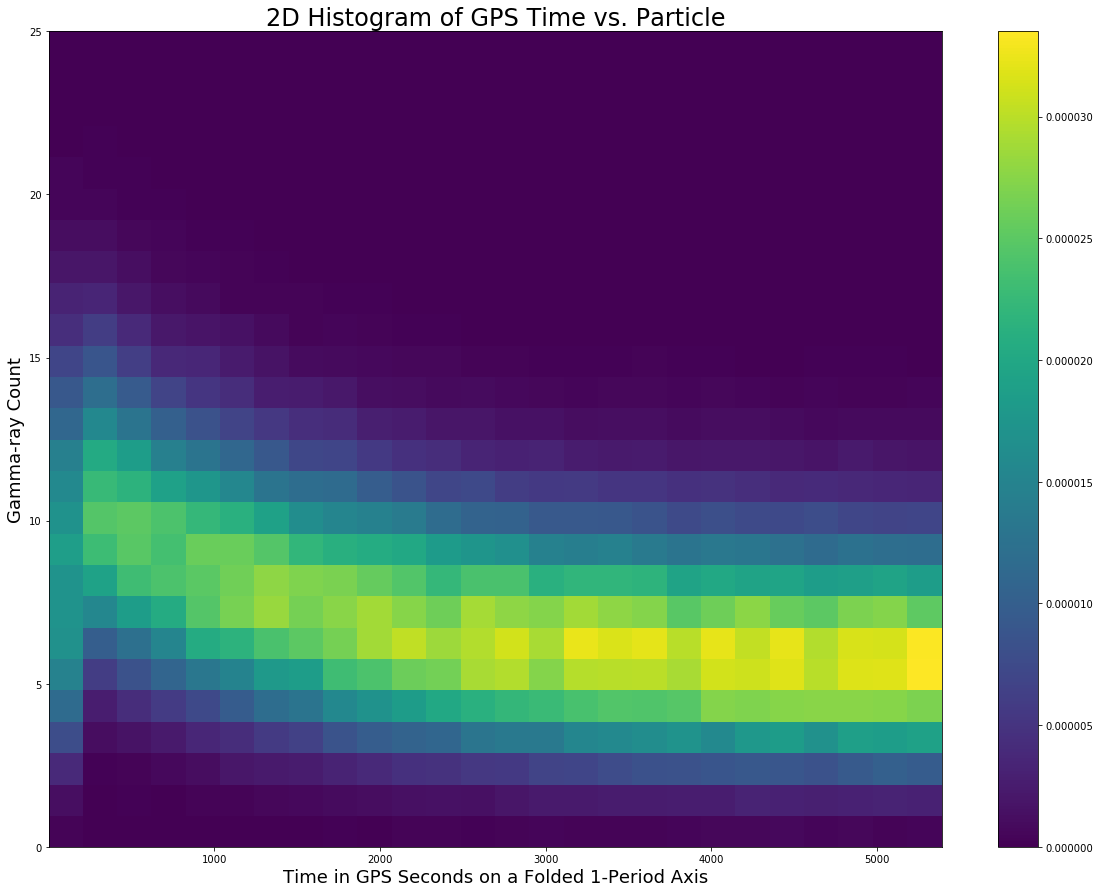

In [124]:
b = np.vstack((timeGPSfold, y1000))
b.shape
fig, ax = plt.subplots(1, 1)

h = ax.hist2d(b[0,:], b[1,:], bins=(26), density=True)
plt.title("2D Histogram of GPS Time vs. Particle", fontsize = 24)
plt.xlabel("Time in GPS Seconds on a Folded 1-Period Axis", fontsize = 18)
plt.ylabel("Gamma-ray Count", fontsize = 18)
plt.colorbar(h[3], ax=ax)

- I noticed after plotting longitude on my x-axis and gamma ray count on the y-axis that there was a correlation between the two
- To turn the gamma-ray count into a time dependent variable, I remmebered that the satellite had a full orbital period of 90 minutes, so every (90\*60) seconds was how often the orbit would repeat on the time axis
- I then plotted a folded x-axis scatter plot and 2D histogram that folded each individual period of 1 orbit and plotted the gamma counts during each period on top of one another. This showed the same pattern in the data as the Longitude vs. Gamma Count graph. 
  - The pattern in the data shows a recurring rising spike where gamma count $\gamma = 20 - 25$ counts and cooldown of the gamma count over every satellite orbit to a final range of $\gamma = 5 - 10$ counts, and we have defined the beginning of each orbit, $t=0$, to correlate to the spike in gamma-count, and the end of each orbit to be 90\*60 seconds after $t=0$, at $t=5400$ seconds.
- I see signal contamination in the form of a periodic, decreasing during the period, spike in my dataset which is affecting the overall distribution of my data. 
- I can build a background pdf() for the spike with decreasing value over time affecting my data set by fitting a pdf() to the mean values of the gamma count data $\gamma$ on my folded axes plot, where all gamma counts are plotted on one full period of time. I can then compare the fit to the actual distribution and adjust as necessary until I have a background pdf() function.

Poisson Fit Parameters:
    a = 10.57393069842126
    loc = -2.7393185309938946
    scale = 0.9304078074487563


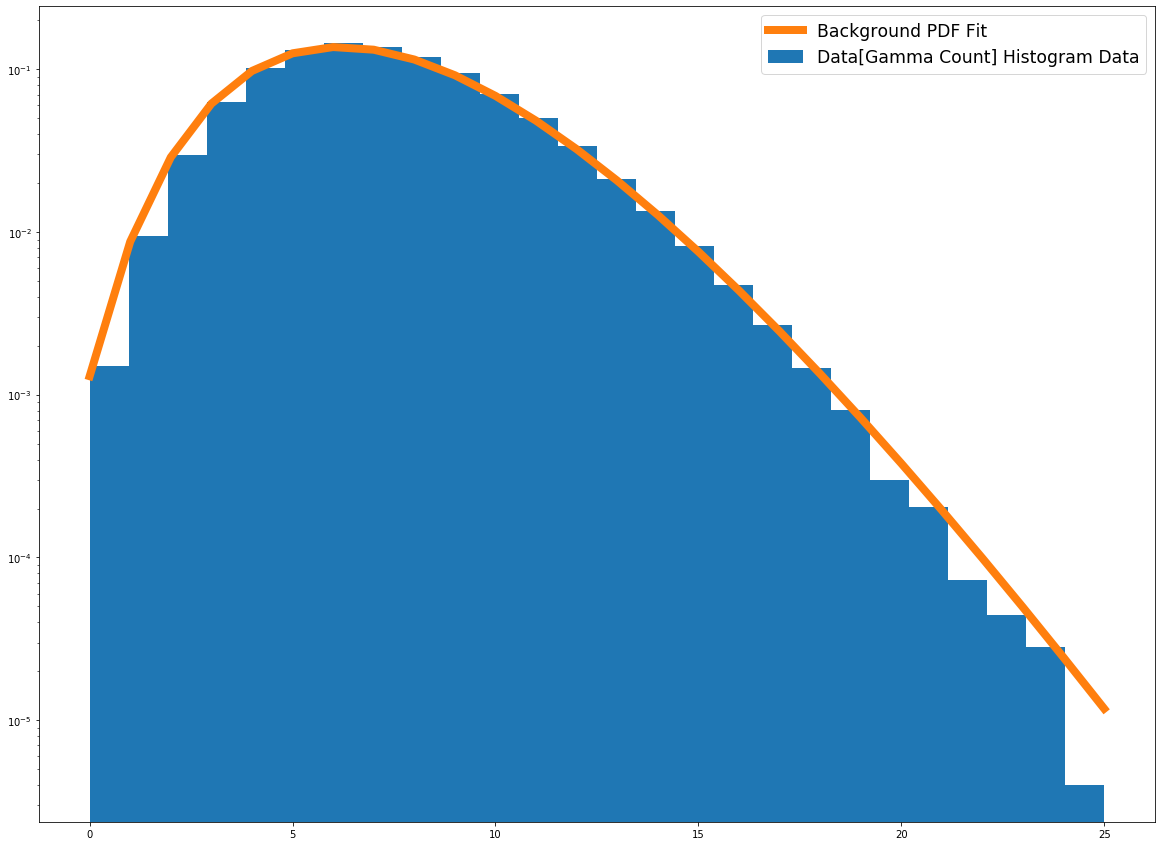

In [125]:
gamma = data[3,::100]
gammaSorted = np.sort(data[3,::100])
fig, ax = plt.subplots(1,1)
plt.yscale('log')


ax.hist(gammaSorted, 26, density=True, label='Data[Gamma Count] Histogram Data')

fit_a, fit_loc, fit_beta=stats.gamma.fit(gammaSorted)
print('Poisson Fit Parameters:')
print(f'    a = {fit_a}')
print(f'    loc = {fit_loc}')
print(f'    scale = {fit_beta}')

axplot = ax.plot(gammaSorted, stats.gamma.pdf(gammaSorted, a=fit_a, loc=fit_loc, scale=fit_beta), lw=8, label='Background PDF Fit')


ax.legend(loc='best', fontsize='xx-large')
plt.show()

- We fit a gamma distribution PDF to the measurment of counts of gamma-rays and cosmic rays in our dataset, and we found a PDF of that fit function which we plotted against the histogram of probabilities of every 100th data point in our dataset, which were sorted after being picked from the dataset and then plotted into integer amount of bins from 0 to 24, which is chosen because the counts are plotted on the x-axis in integer amounts, so every count can then be plotted into an individual bin for that specific count value
- Our background distribution over the entire dataset (i.e. multiple orbits) is gamma-distributed, so we can apply the logic to each individual orbit of data in our dataset that for every orbit (5400 seconds) of collected data, there is a gamma-distributed background that contaminates our incoming signal of gamma-ray counts. 
- The background of our dataset is not consistent across the dataset because the data follows a periodic trend that repeats with every orbit of 5400 GPS seconds (i.e. 90 minutes) and the satellite was found above to orbit a total of 480 times over 30 days. Since the total background can be assigned to a gamma PDF fit, any given measurement within any given singular orbit period, will also have a gamma-distributed background 

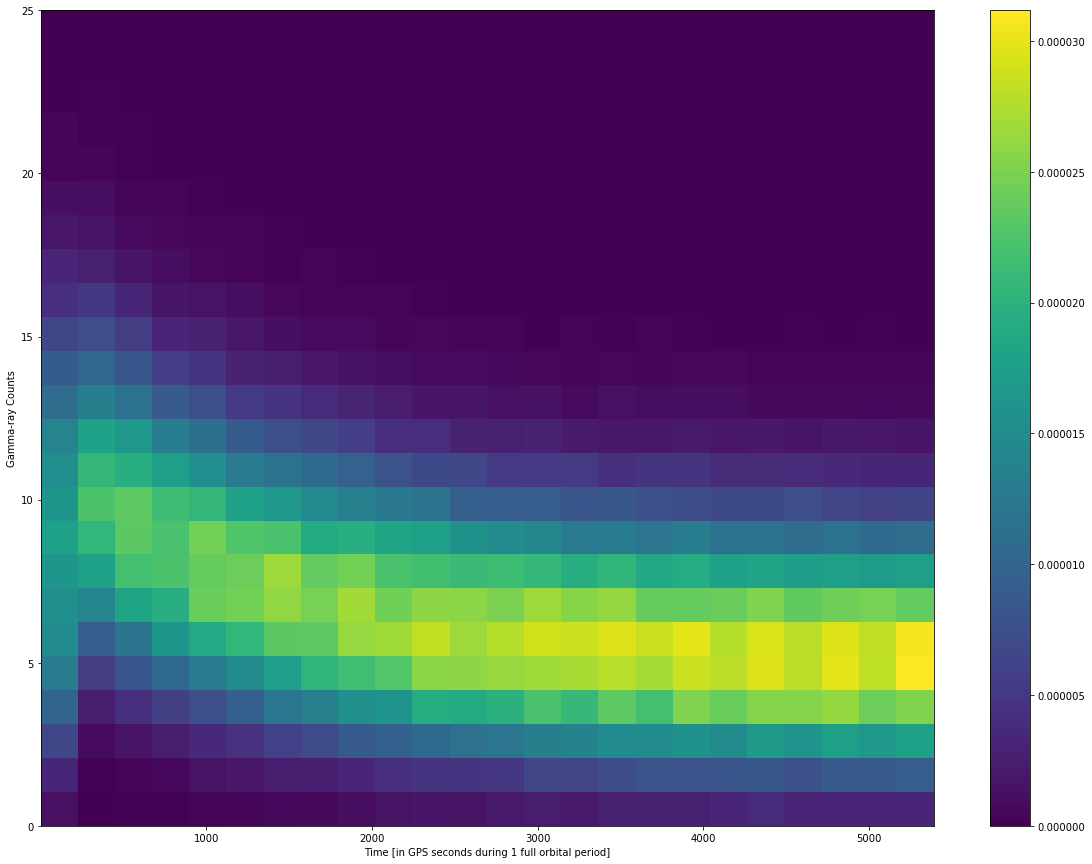

In [126]:
timeGPSfold = (data[0,::100]-3985) % 5400
gammafold = data[3,::100]

fig, ax = plt.subplots(1,1)

plot = plt.hist2d(timeGPSfold, gammafold, bins=24, density=True, cmap='viridis')
plt.colorbar(plot[3], ax=ax)
plt.xlabel('Time [in GPS seconds during 1 full orbital period]')
plt.ylabel('Gamma-ray Counts')
plt.ylim(0,25,1)
plt.show()

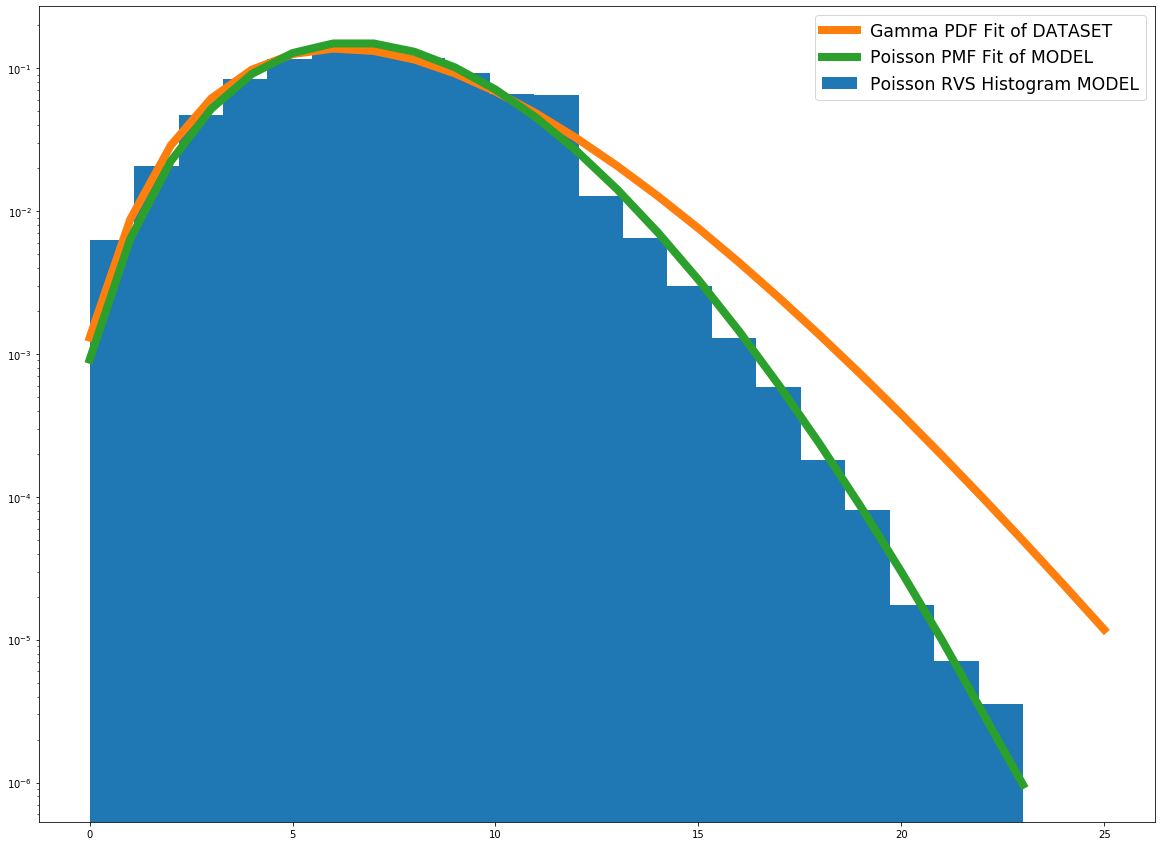

In [153]:
kP = np.arange(0, 40)
Poisson1 = np.sort(stats.poisson.rvs(loc=0, mu=7, size=len(timeGPSfold)))
ppmf = stats.poisson.pmf(Poisson1, loc=0, mu=7)

fig, ax = plt.subplots(1,1)
plt.yscale('log')

ax.hist(Poisson1, bins=21, density=True, label='Poisson RVS Histogram MODEL')

ax.plot(gammaSorted, stats.gamma.pdf(gammaSorted, a=fit_alpha, loc=fit_loc, 
                                     scale=fit_beta), lw=8, 
        label='Gamma PDF Fit of DATASET')

ax.plot(Poisson1, ppmf, lw=8, label='Poisson PMF Fit of MODEL')
ax.legend(loc='best', fontsize='xx-large')
plt.show()

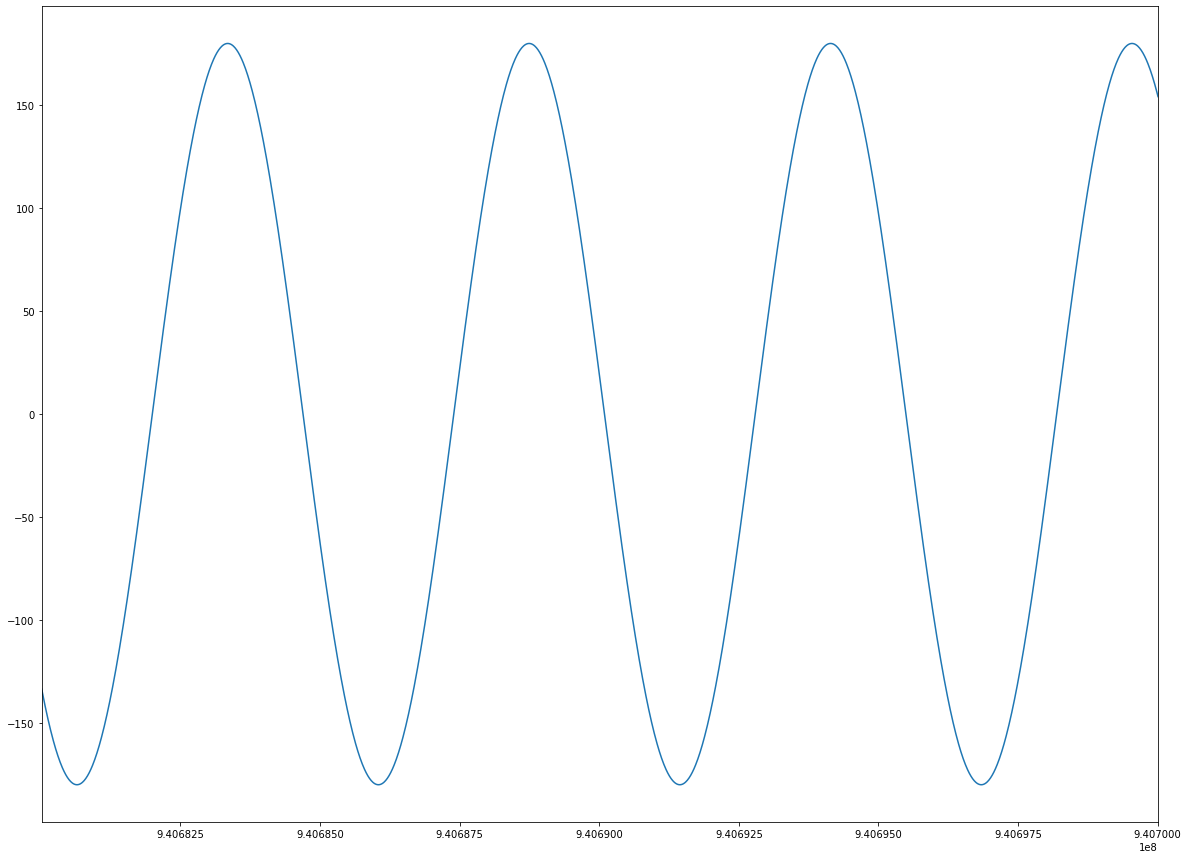

(-133.82958608969105, -133.53853255618134)

In [66]:
x = np.int(data[0,:1:1]) #time t = 0 but actual time value
def longitude(t):
    result = (180 * np.sin(0.001164*(t + 940721760.3)))
    return result
fig, ax = plt.subplots(1,1)
ax.plot(timeGPS, longitude(timeGPS))
plt.xlim(np.int(data[0,:1:1]), 9.407e8)
plt.show()
longitude(x+5400), longitude(x)

- Since the gamma count measurements are only integer values, we believe they are discretely distributed such that any measurement value taken at random will always be an integer value. We think this distribution of data follows a Poisson distribution with values of expected value called $\lambda$ where $\lambda (AKA \mu) = 7.0$ which is the average gamma count measurement over the total dataset, and a k-axis of occurences such that any possible occurence of counts during the dataset can range from 0 to 40. 
  - The minimum is 0 because we can't expect less than zero gamma counts over any given period.
  - The maximum is 40 in our k-axis because while the maximum value in the dataset for gamma counts is 30, over more trials it could be found that (while unlikely) it is possible to get more than 30 gamma counts in any random second of measurement. It should be emphasized that getting any more than 20 gamma counts in any given second of measurement is extremely unlikely.
- Our gamma count distribution closely follows a Poisson distribution for any given orbital period 

In [132]:
Poisson1, np.sort(gammafold)

(array([ 0,  0,  0, ..., 21, 22, 22]),
 array([ 0.,  0.,  0., ..., 24., 24., 25.]))

In [133]:
gammaSorted.mean()

7.098749619021532

In [147]:
len(timeGPSfold)

259201